In [1]:
import sys

sys.path.append("lib")

from functorch import vmap

import matplotlib.pyplot as plt

import lib
import torch
import math

In [2]:
device = torch.device("cuda")

In [3]:
Nx = 100
Ny = 100
mesh = lib.mesh.RectangleMesh({"xmin": 0, "xmax": 10, "ymin": 0, "ymax": 10, "Nx": Nx, "Ny": Ny}, device)

problem = lib.problem.FEProblem(mesh)
problem.add_variable("ux", lambda x : torch.sin(x[0]))
problem.add_variable("uy", lambda x : torch.sin(x[1]))
problem.add_weakform(lib.weakform.Diffusion(problem, {"variable":"ux"}))
problem.add_weakform(lib.weakform.Diffusion(problem, {"variable":"uy"}))
problem.init_solution()

problem.write_vtk("foo.vtk")

In [4]:
jacobian = problem.jacobian()

In [5]:
jacobian.shape
# set bc
# solve

(20402, 20402)

In [6]:
import matplotlib.pyplot as plt

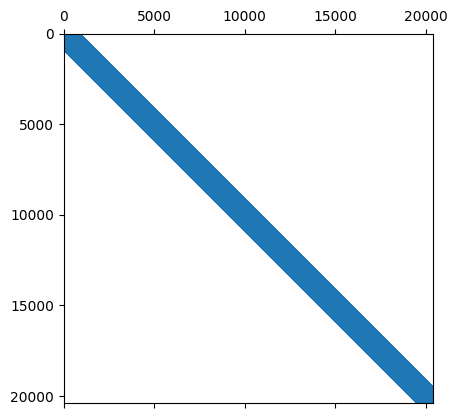

In [7]:
plt.spy(jacobian)